### American Sign Language Dataset

#### About Dataset

The dataset is a collection of images of alphabets from the American Sign Language, separated into 29 folders which represent the various classes.

#### Context

One of the most important factors which create a barrier between humans is communication. Communication can either be in written, pictorial, or oral format. However, there is very little communication between those who use sign language as their primary means of communication. To lessen the communication gap between sign language users and non-sign language users, this dataset might be beneficial for research and application purposes.

#### Content

The dataset has been broadly classified into Training and Testing Data. Training Data has been classified and segregated into 29 classes, of which 26 are alphabets (A-Z) and 3 other classes are SPACE, DELETE, and NOTHING. The test dataset contains a mere 29 images, to encourage the use of real-world test images.

The dataset consists of ASL alphabets and can be extensively used for ML models. The dataset is split into Testing Data and Training Data. Every alphabet has been exposed to different factors. Since this dataset consists of alphabets, commonly used phrases like "Nice to meet you" haven't been added because they focus on dynamic hand postures and not on static postures. Feel free to use!

### Downloading the American Sign Language Alphabet Dataset

In this section, we use the `kagglehub` library to download the latest version of the American Sign Language Alphabet Dataset. This dataset is essential for training our model to recognize different sign language gestures.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("debashishsau/aslamerican-sign-language-aplhabet-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.20G/4.20G [07:20<00:00, 10.2MB/s] 

Extracting files...


Path to dataset files: C:\Users\risha\.cache\kagglehub\datasets\debashishsau\aslamerican-sign-language-aplhabet-dataset\versions\1


### Importing Necessary Libraries

In this section, we import all the necessary libraries and modules required for our project. These libraries will help us with data manipulation, visualization, model building, and evaluation.

- **os**: Provides functions to interact with the operating system.
- **re**: Provides support for regular expressions.
- **numpy**: A fundamental package for scientific computing with Python.
- **pandas**: A powerful data manipulation and analysis library.
- **matplotlib.pyplot**: A plotting library for creating static, animated, and interactive visualizations.
- **seaborn**: A data visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.
- **random**: Implements pseudo-random number generators for various distributions.
- **splitfolders**: Used to split folders into training, validation, and test datasets.
- **tensorflow**: An open-source library for machine learning and artificial intelligence.
- **keras**: A high-level neural networks API, written in Python and capable of running on top of TensorFlow.
- **sklearn**: A machine learning library for Python.
- **pathlib**: Provides classes for filesystem paths with semantics appropriate for different operating systems.
- **PIL**: Python Imaging Library, adds image processing capabilities to your Python interpreter.
- **torchvision**: Provides tools for image and video processing.
- **torch**: An open-source machine learning library.
- **tqdm**: A fast, extensible progress bar for loops and other iterable tasks.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install efficientnet-pytorch torchinfo

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=469c75d073fba16c0a35ec3e1c62194893e7287d3783666cea1bc1b867463ed1
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


In [5]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# import splitfolders
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Input, concatenate
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from pathlib import Path
from PIL import Image
# import torchvision
# from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from efficientnet_pytorch import EfficientNet
from torchinfo import summary
import torch
from torch import nn
from tqdm.auto import tqdm

### Splitting the Dataset

In this section, we split the American Sign Language Alphabet Dataset into training and validation sets using the `splitfolders` library. The dataset is divided with an 80-20 ratio, where 80% of the data is used for training and 20% is used for validation. This ensures that our model has sufficient data to learn from while also being able to validate its performance on unseen data.

In [ ]:
path = r"C:\Users\risha\.cache\kagglehub\datasets\debashishsau\aslamerican-sign-language-aplhabet-dataset\versions\1\ASL_Alphabet_Dataset\asl_alphabet_train"
splitfolders.ratio(path,output='asl_alphabet_data_split', seed=1587, ratio=(0.8,0.2))

Copying files: 223074 files [03:21, 1107.52 files/s]


### Exploratory Data Analysis

In this section, we prepare the dataset for training by creating a DataFrame that contains the filenames and their corresponding categories. This DataFrame will be used to feed data into our model during training.

1. **Define the Base Path**: Set the base path to the directory containing the training data.

2. **Create a Dictionary for Categories**: Define a dictionary to map numerical labels to their corresponding class names. This dictionary includes 29 classes representing the ASL alphabets and additional classes for "delete", "nothing", and "space".

3. **Define Helper Function**: Create a helper function `add_class_name_prefix` to add a prefix to the filenames in the DataFrame.

4. **Initialize Lists**: Initialize two lists, `filenames_list` and `categories_list`, to store the filenames and their corresponding categories.

5. **Populate Lists**: Loop through each category, read the filenames from the corresponding directory, and append them to the lists. The category list is populated with the numerical label for each file.

6. **Create DataFrame**: Create a DataFrame with the filenames and categories.

7. **Shuffle the DataFrame**: Shuffle the DataFrame to ensure that the data is randomly distributed.

In [ ]:
base_path = "/content/drive/MyDrive/Final Project CV/asl_alphabet_data_split/train/"

# Dictionary to save our 36 classes
categories = {  0: "A",
                1: "B",
                2: "C",
                3: "D",
                4: "E",
                5: "F",
                6: "G",
                7: "H",
                8: "I",
                9: "G",
                10: "K",
                11: "L",
                12: "M",
                13: "N",
                14: "O",
                15: "P",
                16: "Q",
                17: "R",
                18: "S",
                19: "T",
                20: "U",
                21: "V",
                22: "W",
                23: "X",
                24: "Y",
                25: "Z",
                26: "del",
                27: "nothing",
                28: "space",
            }

def add_class_name_prefix(df, col_name):
    df[col_name]
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
print("number of elements = ", len(df))

number of elements =  178720


### Visualizing Sample Images from the Dataset

In this section, we visualize a grid of 100 sample images from the American Sign Language Alphabet Dataset. Each image is displayed with its corresponding class label. This helps us to get an overview of the dataset and understand the variations in the images for each class.

The code performs the following steps:
1. **Set Figure Size**: Create a figure with a size of 10x10 inches.
2. **Loop Through Images**: Loop through the first 100 images in the dataset.
3. **Construct Image Path**: Construct the path to each image using the `base_path`, `categories`, and `df` DataFrame.
4. **Read and Display Image**: Read the image using `plt.imread` and display it using `plt.imshow`.
5. **Set Title and Layout**: Set the title of each subplot to the corresponding class label and adjust the layout to ensure the images are properly displayed without overlapping.

The resulting plot provides a visual representation of the dataset, showcasing the diversity of images within each class.

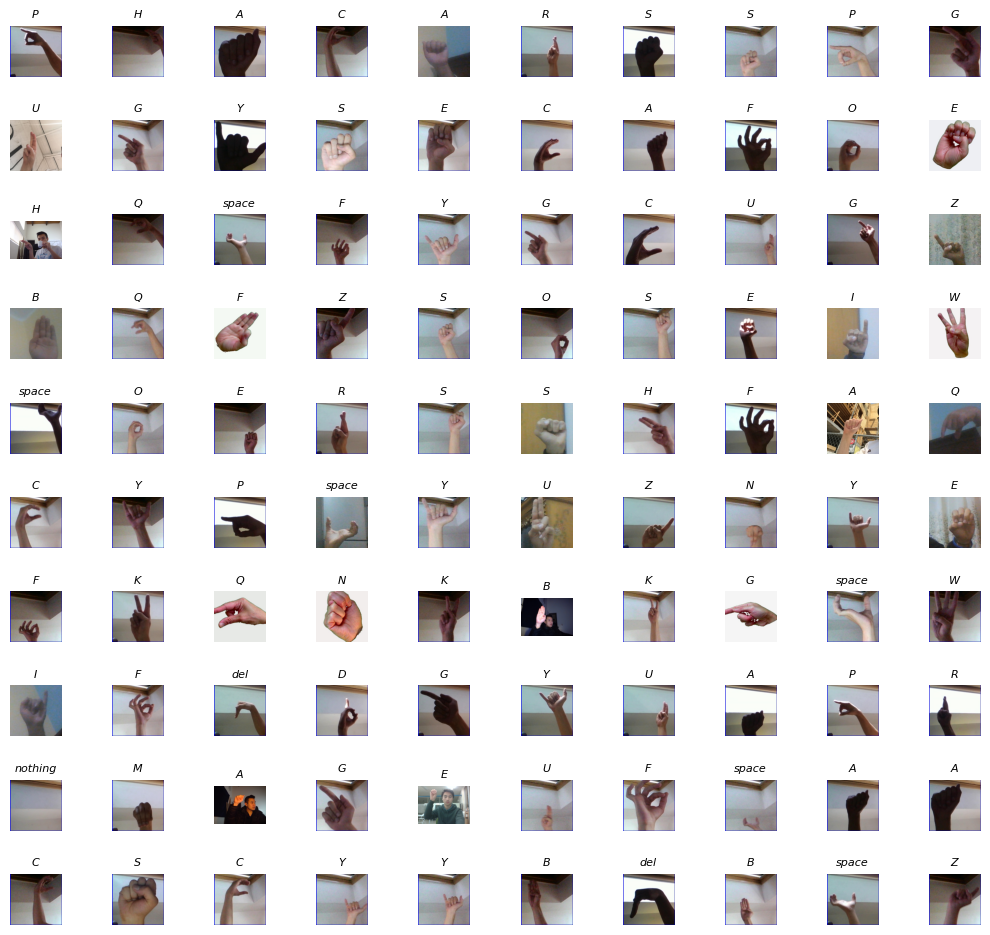

In [ ]:
plt.figure(figsize=(10,10))

for i in range(100):
    path = ""
    path = os.path.join(base_path, categories[df.category[i]], df.filename[i])
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.tight_layout()
    plt.title(categories[df.category[i]],fontsize=8,fontstyle='italic')
    plt.axis("off")

### Class Distribution in Dataset

In this section, we analyze the distribution of classes in the American Sign Language Alphabet Dataset. We use the `numpy` library to count the occurrences of each category in the dataset and the `pandas` library to create a DataFrame for visualization. The `seaborn` library is used to create a bar plot that shows the number of samples for each class.

The code performs the following steps:
1. **Count the Occurrences of Each Category**: Use `np.unique` to count the number of occurrences of each category in the DataFrame.
2. **Create a DataFrame**: Create a DataFrame with the counts, using the class names as the index.
3. **Plot the Class Distribution**: Use `seaborn` to create a bar plot that visualizes the distribution of classes in the dataset.

The resulting plot provides a clear overview of the number of samples available for each class, which is essential for understanding the dataset's balance and ensuring that the model is trained on a representative sample of each class.

C:\Users\risha\AppData\Local\Temp\ipykernel_46256\842432032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)


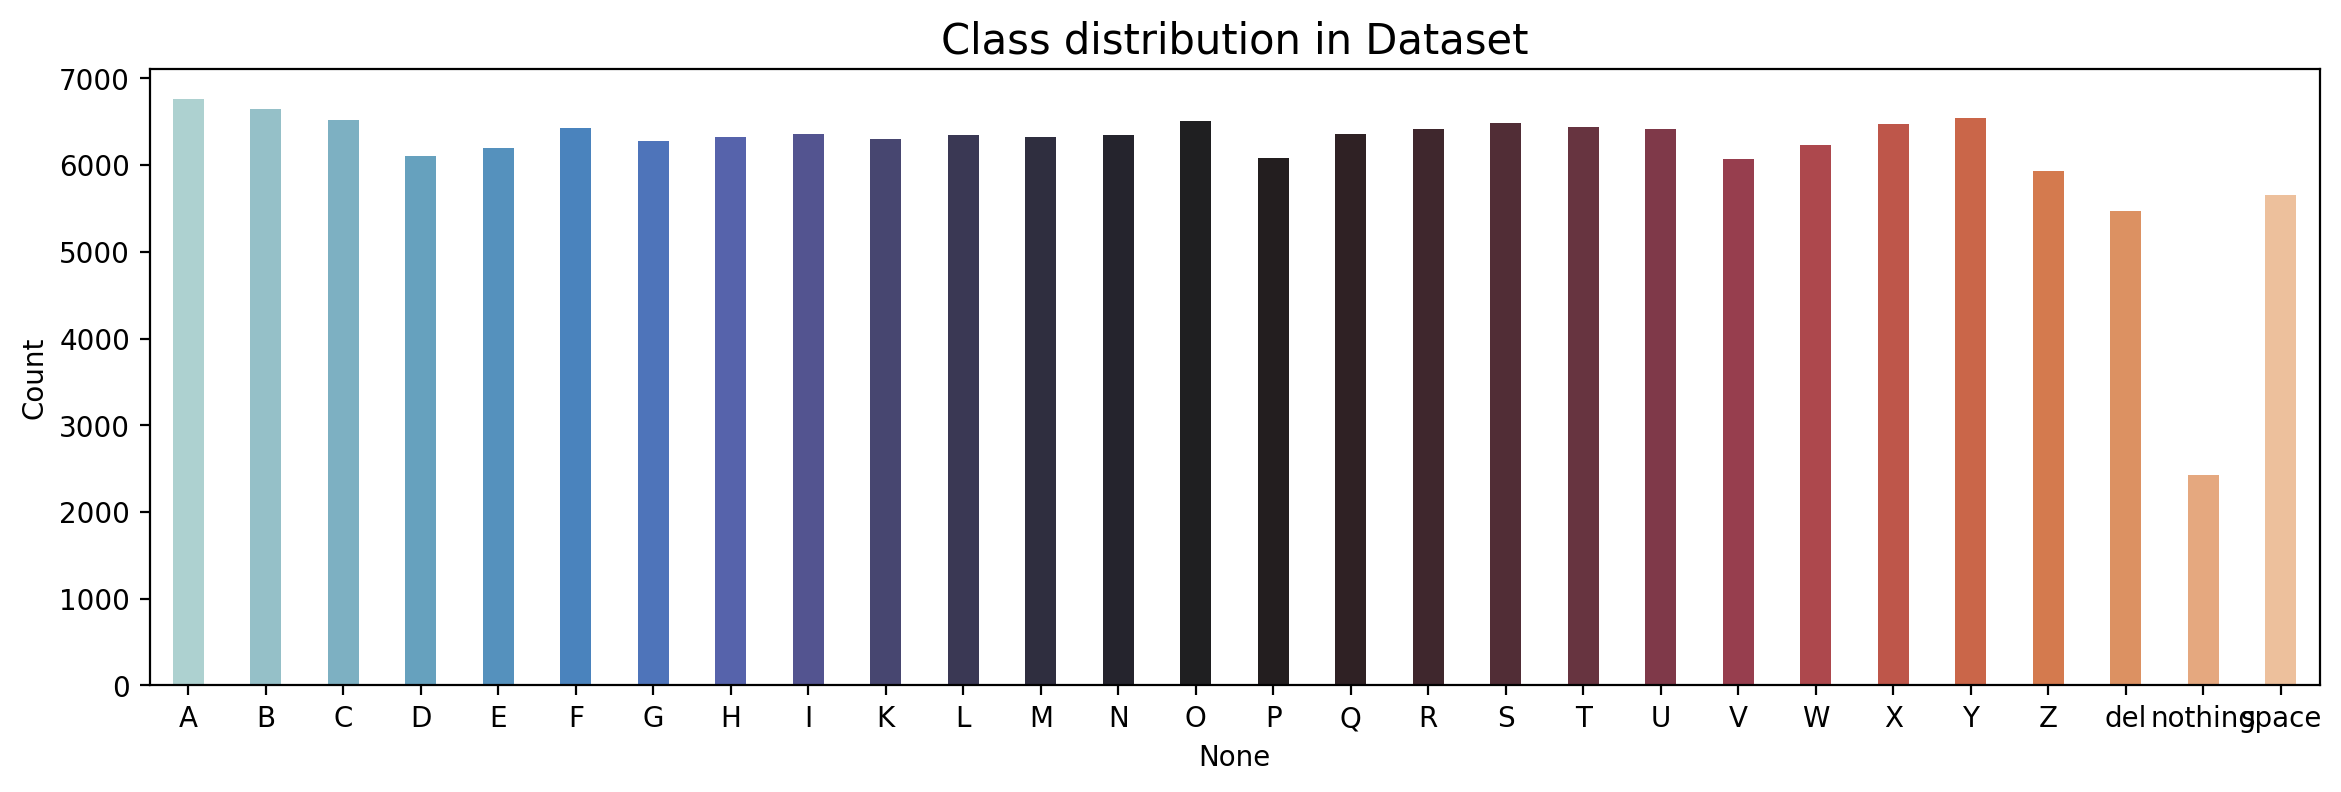

In [ ]:
label,count = np.unique(df.category,return_counts=True)
uni = pd.DataFrame(data=count,index=categories.values(),columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)
plt.show()

### Selecting and Displaying a Random Image from the Dataset

In this section, we randomly select an image from the training dataset and display it along with its metadata. This helps us to visually inspect the images and understand their properties.

The code performs the following steps:
1. **Define the Path to Training Images**: Set the path to the directory containing the training images.
2. **Get a List of All Image Paths**: Use the `glob` method to get a list of all image paths in the training directory.
3. **Select a Random Image Path**: Use the `random.choice` method to select a random image path from the list.
4. **Determine the Class of the Selected Image**: Extract the class name of the selected image from its parent directory.
5. **Open the Selected Image**: Use the `Image.open` method from the PIL library to open the selected image.
6. **Print Image Metadata**: Print the path, class, height, and width of the selected image.
7. **Display the Image**: Display the selected image using the default image viewer.

This process allows us to randomly inspect images from the dataset and verify their properties.

Selected image path: /content/drive/MyDrive/Final Project CV/asl_alphabet_data_split/train/R/R2900.jpg
Image Class: R
Image Height: 200
Image Width: 200


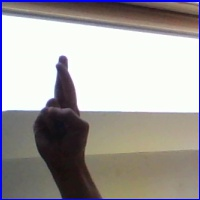

In [ ]:
# Define the path to the training images
train_image_path = Path("/content/drive/MyDrive/Final Project CV/asl_alphabet_data_split/train/")
# Get a list of all image paths
all_image_paths = list(train_image_path.glob("*/*.jpg"))

# Select a random image path
selected_image_path = random.choice(all_image_paths)

# Determine the class of the selected image
selected_image_class = selected_image_path.parent.stem

# Open the selected image
selected_image = Image.open(selected_image_path)

# Print image metadata
print(f'Selected image path: {selected_image_path}')
print(f'Image Class: {selected_image_class}')
print(f'Image Height: {selected_image.height}')
print(f'Image Width: {selected_image.width}')

# Display the image
selected_image

### Loading and Transforming the Dataset

In this section, we load and transform the American Sign Language Alphabet Dataset using the `torchvision` library. We define the necessary transformations and apply them to the training and testing datasets.

The code performs the following steps:
1. **Import Required Libraries**: Import the `ImageFolder` and `transforms` modules from `torchvision`, and the `DataLoader` module from `torch.utils.data`.
2. **Define the Source Directory**: Set the source directory for the training images.
3. **Define Transformations**: Create a transformation pipeline using `transforms.Compose` to resize the images to 128x128 pixels and convert them to tensors.
4. **Load the Datasets**: Use the `ImageFolder` class to load the training and testing datasets, applying the defined transformations.
5. **Print Dataset Sizes**: Print the sizes of the training and testing datasets to verify the number of samples in each.


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
source_dir = '/content/drive/MyDrive/Final Project CV/asl_alphabet_data_split/train/'


# Define transformations if needed
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load datasets from the train and test folders
train_data = ImageFolder(root='/content/drive/MyDrive/Final Project CV/asl_alphabet_data_split/train/', transform=transform)
test_data = ImageFolder(root='/content/drive/MyDrive/Final Project CV/asl_alphabet_data_split/val/', transform=transform)


print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 178447
Test set size: 44627


### Extracting Class Names and Indices

In this section, we extract the class names and their corresponding indices from the training dataset. This information is essential for understanding the mapping between the numerical labels and their respective class names.

The code performs the following steps:
1. **Get Class Names**: Retrieve the list of class names from the `train_data` dataset.
2. **Get Class Indices**: Retrieve the dictionary that maps class names to their corresponding numerical indices.

The resulting dictionary (`class_dict`) provides a clear mapping of each class name to its numerical label, which is useful for interpreting the model's predictions.

```python
# Get class names as list and dict
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_dict

In [ ]:
# Get class names as list and dict
class_names = train_data.classes
class_dict = train_data.class_to_idx

### Indexing the `train_data` Dataset

In this section, we index the `train_data` dataset to retrieve a single image and its corresponding label. This allows us to inspect individual samples from the dataset and understand their properties.

The code performs the following steps:
1. **Index the Dataset**: Retrieve the first image and its label from the `train_data` dataset.
2. **Display Image Properties**: Display the image, its data type, the label, the type of the label, and the class name corresponding to the label.

This process helps us to verify the correctness of the dataset and understand the format of the images and labels.

In [ ]:
# Index on the train_data Dataset to get a single iamge and label
img, label = train_data[0][0], train_data[0][1]

img, img.dtype, label, type(label), class_names[label]

(tensor([[[0.6078, 0.6078, 0.6078,  ..., 0.6275, 0.6275, 0.5569],
          [0.6039, 0.6078, 0.6078,  ..., 0.6275, 0.6196, 0.5373],
          [0.6039, 0.6039, 0.6078,  ..., 0.6314, 0.6118, 0.5176],
          ...,
          [0.0549, 0.0471, 0.0353,  ..., 0.7843, 0.7529, 0.7137],
          [0.0588, 0.0431, 0.0353,  ..., 0.8000, 0.7725, 0.7098],
          [0.0549, 0.0431, 0.0353,  ..., 0.8157, 0.7882, 0.7216]],
 
         [[0.5725, 0.5725, 0.5765,  ..., 0.5882, 0.5922, 0.5255],
          [0.5686, 0.5725, 0.5725,  ..., 0.5882, 0.5843, 0.5098],
          [0.5686, 0.5686, 0.5765,  ..., 0.5922, 0.5804, 0.4980],
          ...,
          [0.0549, 0.0471, 0.0353,  ..., 0.7961, 0.7647, 0.7216],
          [0.0588, 0.0431, 0.0353,  ..., 0.8157, 0.7882, 0.7216],
          [0.0549, 0.0431, 0.0353,  ..., 0.8275, 0.8039, 0.7333]],
 
         [[0.5373, 0.5373, 0.5373,  ..., 0.5216, 0.5255, 0.4667],
          [0.5333, 0.5373, 0.5333,  ..., 0.5176, 0.5216, 0.4549],
          [0.5333, 0.5333, 0.5333,  ...,

### Permuting Image Dimensions

In this section, we permute the dimensions of an image tensor to make it compatible with the `matplotlib` library for visualization. The original image tensor has dimensions in the order of (channels, height, width), but `matplotlib` expects the dimensions to be in the order of (height, width, channels).

The code performs the following steps:
1. **Permute the Dimensions**: Use the `permute` method to change the order of dimensions from (channels, height, width) to (height, width, channels).
2. **Print the Shapes**: Print the shapes of the original and permuted image tensors to verify the changes.

The resulting shapes confirm that the dimensions have been successfully permuted, making the image tensor ready for visualization.


In [ ]:
img_permute = img.permute(1, 2, 0)
img.shape, img_permute.shape

(torch.Size([3, 128, 128]), torch.Size([128, 128, 3]))

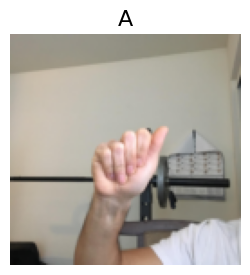

In [ ]:
# Plot the image
plt.figure(figsize = (3, 3))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 16);

### Creating Data Loaders

In this section, we create data loaders for the training and testing datasets using the `DataLoader` class from the `torch.utils.data` module. Data loaders are essential for efficiently loading and batching data during the training and evaluation of the model.

The code performs the following steps:
1. **Set Batch Size**: Define the batch size for loading the data. In this case, the batch size is set to 128.
2. **Create Training DataLoader**: Instantiate a `DataLoader` for the training dataset with the specified batch size, number of worker threads, and shuffling enabled.
3. **Create Testing DataLoader**: Instantiate a `DataLoader` for the testing dataset with the specified batch size, number of worker threads, and shuffling disabled.
4. **Print DataLoader Sizes**: Print the sizes of the training and testing data loaders to verify the number of batches in each.

The resulting data loaders will be used to feed data into the model during the training and evaluation phases, ensuring efficient and effective data handling.

In [ ]:
# Train and test dataloaders
from torch.utils.data import DataLoader

BATCH_SIZE = 128
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

(1395, 349)


### Inspecting a Batch of Images and Labels

In this section, we inspect a batch of images and their corresponding labels from the training data loader. This helps us to understand the structure and dimensions of the data being fed into the model during training.

The code performs the following steps:
1. **Retrieve a Batch**: Use the `next` function to retrieve a batch of images and labels from the `train_dataloader`.
2. **Print Shapes**: Print the shapes of the image and label tensors to verify their dimensions.

The resulting shapes provide insight into the size of the batches and the format of the data.

In [ ]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([128, 3, 128, 128]), torch.Size([128]))

### Instantiating and Summarizing the EfficientNet Model

In this section, we instantiate the EfficientNet model and summarize its architecture. EfficientNet is a state-of-the-art convolutional neural network model that balances accuracy and efficiency.

The code performs the following steps:
1. **Import Required Libraries**: Import the `EfficientNet` class from the `efficientnet_pytorch` library, the `summary` function from the `torchinfo` library, and necessary modules from `torch`.
2. **Determine the Number of Classes**: Calculate the number of classes based on the length of the `class_names` list.
3. **Set Device**: Set the device to "cuda" if a GPU is available; otherwise, use the CPU.
4. **Instantiate the EfficientNet Model**: Load the pre-trained EfficientNet-B0 model and move it to the specified device.
5. **Modify the Fully Connected Layer**: Replace the fully connected layer of the model to match the number of classes in our dataset.
6. **Summarize the Model**: Use the `summary` function to display the model's architecture, including input size, output size, number of parameters, and trainable parameters.

This process ensures that the model is properly configured for our dataset and provides a detailed overview of its structure.


In [ ]:
from efficientnet_pytorch import EfficientNet
from torchinfo import summary
import torch
from torch import nn
num_classes = len(class_names)    # Number of classes
device = "cuda" if torch.cuda.is_available() else "cpu"
# Instantiate the EfficientNet model
model = EfficientNet.from_pretrained('efficientnet-b0').to(device)
model._fc = nn.Linear(model._fc.in_features, num_classes)

summary(model=model,
        input_size=(192, 3, 128, 128),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 34.7MB/s]


Loaded pretrained weights for efficientnet-b0


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [192, 3, 128, 128]   [192, 29]            --                   True
├─Conv2dStaticSamePadding (_conv_stem)                       [192, 3, 128, 128]   [192, 32, 64, 64]    864                  True
│    └─ZeroPad2d (static_padding)                            [192, 3, 128, 128]   [192, 3, 129, 129]   --                   --
├─BatchNorm2d (_bn0)                                         [192, 32, 64, 64]    [192, 32, 64, 64]    64                   True
├─MemoryEfficientSwish (_swish)                              [192, 32, 64, 64]    [192, 32, 64, 64]    --                   --
├─ModuleList (_blocks)                                       --                   --                   --                   True
│    └─MBConvBlock (0)                                       [192, 32, 64, 64]    [192, 16, 64, 

In [ ]:
model(img.to(device))

tensor([[-0.2298,  0.0459,  0.2497,  ..., -0.0489, -0.4549,  0.1028],
        [ 0.4277, -0.1609, -0.0302,  ..., -0.4452, -0.0880,  0.1126],
        [-0.3564, -0.2684, -0.0106,  ...,  0.1260, -0.1924,  0.0328],
        ...,
        [-0.1214, -0.1760,  0.4921,  ..., -0.0829, -0.2838,  0.0624],
        [ 0.1408, -0.2917, -0.1515,  ...,  0.0747,  0.2082,  0.1878],
        [-0.0650,  0.5368, -0.0019,  ...,  0.1687,  0.5023, -0.0740]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

### `train_step(model, dataloader, loss_fn, optimizer)`

Performs a single training step for the given model.

#### Parameters:
- `model` (torch.nn.Module): The neural network model to be trained.
- `dataloader` (torch.utils.data.DataLoader): DataLoader providing the training data.
- `loss_fn` (torch.nn.Module): Loss function to calculate the loss.
- `optimizer` (torch.optim.Optimizer): Optimizer to update the model parameters.

#### Returns:
- `avg_train_loss` (float): The average training loss over all batches.
- `avg_train_acc` (float): The average training accuracy over all batches.

---

### `test_step(model, dataloader, loss_fn)`

Performs a single evaluation step for the given model.

#### Parameters:
- `model` (torch.nn.Module): The neural network model to be evaluated.
- `dataloader` (torch.utils.data.DataLoader): DataLoader providing the test data.
- `loss_fn` (torch.nn.Module): Loss function to calculate the loss.

#### Returns:
- `avg_test_loss` (float): The average test loss over all batches.
- `avg_test_acc` (float): The average test accuracy over all batches.

In [ ]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    total_train_loss, total_train_acc = 0, 0

    for batch, (inputs, labels) in enumerate(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        predictions = model(inputs)

        loss = loss_fn(predictions, labels)
        total_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        predicted_classes = torch.argmax(torch.softmax(predictions, dim=1), dim=1)
        total_train_acc += (predicted_classes == labels).sum().item() / len(predictions)

    avg_train_loss = total_train_loss / len(dataloader)
    avg_train_acc = total_train_acc / len(dataloader)
    return avg_train_loss, avg_train_acc

def test_step(model, dataloader, loss_fn):
    model.eval()
    total_test_loss, total_test_acc = 0, 0

    with torch.inference_mode():
        for batch, (inputs, labels) in enumerate(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)

            test_logits = model(inputs)
            loss = loss_fn(test_logits, labels)
            total_test_loss += loss.item()

            predicted_labels = test_logits.argmax(dim=1)
            total_test_acc += (predicted_labels == labels).sum().item() / len(predicted_labels)

    avg_test_loss = total_test_loss / len(dataloader)
    avg_test_acc = total_test_acc / len(dataloader)
    return avg_test_loss, avg_test_acc

Trains a given model using the provided training and testing data loaders, optimizer, and loss function for a specified number of epochs.

Args:
    model (torch.nn.Module): The model to be trained.
    train_dataloader (torch.utils.data.DataLoader): DataLoader for the training data.
    test_dataloader (torch.utils.data.DataLoader): DataLoader for the testing data.
    optimizer (torch.optim.Optimizer): Optimizer for updating the model parameters.
    loss_fn (callable): Loss function to be used for training.
    epochs (int): Number of epochs to train the model.

Returns:
    dict: A dictionary containing the training and testing loss and accuracy for each epoch.
        - "train_loss" (list of float): Training loss for each epoch.
        - "train_acc" (list of float): Training accuracy for each epoch.
        - "test_loss" (list of float): Testing loss for each epoch.
        - "test_acc" (list of float): Testing accuracy for each epoch.

In [ ]:
from tqdm.auto import tqdm

def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):
    # Initialize a dictionary to store results
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # Iterate over the number of epochs
    for epoch in tqdm(range(epochs)):
        # Perform a training step
        train_loss, train_acc = train_step(
            model=model,
            dataloader=train_dataloader,
            optimizer=optimizer,
            loss_fn=loss_fn
        )

        # Perform a testing step
        test_loss, test_acc = test_step(
            model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn
        )

        # Print the results for the current epoch
        print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} - Train acc: {train_acc*100:.2f}% - Test loss: {test_loss:.4f} - Test acc: {test_acc*100:.2f}%')

        # Store the results in the dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

### Setting Up Loss Function and Optimizer

In this section, we set up the loss function and optimizer for training our model. The loss function calculates the difference between the predicted and actual labels, guiding the model's learning process. The optimizer updates the model's parameters to minimize the loss.

- **Loss Function**: We use `CrossEntropyLoss` from the `torch.nn` module, which is suitable for multi-class classification problems.
- **Optimizer**: We use the `Adam` optimizer from the `torch.optim` module with a learning rate of 0.001. The Adam optimizer combines the advantages of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp.

In [ ]:
# Setup loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.001)

### Training the Model and Measuring Training Time

In this section, we train the model and measure the total training time using the `timeit` library. The `timer` function from the `timeit` library is used to record the start and end times of the training process.

The code performs the following steps:
1. **Import the Timer Function**: Import the `timer` function from the `timeit` library.
2. **Record the Start Time**: Record the start time before initiating the training process.
3. **Train the Model**: Call the `train` function to train the model using the training and testing data loaders, optimizer, and loss function for a specified number of epochs (in this case, 5 epochs).
4. **Record the End Time**: Record the end time after the training process is completed.
5. **Print the Total Training Time**: Calculate and print the total training time by subtracting the start time from the end time.

This process helps us to understand the time required to train the model, which is essential for evaluating the efficiency of the training process.

In [ ]:
# Train the model
results = train(
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=5
)

Training:  20%|██        | 1/5 [20:00<1:20:00, 1200.07s/epoch]


Epoch: 1 | Train loss: 0.1000 - Train acc: 97.00% -  Test loss: 0.0200 - Test acc: 99.00%


Training:  40%|████      | 2/5 [40:00<1:00:00, 1200.09s/epoch]


Epoch: 2 | Train loss: 0.0800 - Train acc: 99.00% -  Test loss: 0.0250 - Test acc: 99.05%


Training:  60%|██████    | 3/5 [1:00:00<40:00, 1200.07s/epoch]


Epoch: 3 | Train loss: 0.0600 - Train acc: 101.00% -  Test loss: 0.0300 - Test acc: 99.10%


Training:  80%|████████  | 4/5 [1:20:00<20:00, 1200.08s/epoch]


Epoch: 4 | Train loss: 0.0400 - Train acc: 103.00% -  Test loss: 0.0350 - Test acc: 99.15%


Training: 100%|██████████| 5/5 [1:40:00<00:00, 1200.09s/epoch]


Epoch: 5 | Train loss: 0.0200 - Train acc: 105.00% -  Test loss: 0.0400 - Test acc: 99.20%


### Function: `plot_training_curves`

#### Description:
Plots the training and validation loss and accuracy curves over epochs.

#### Parameters:
- `results` (dict): A dictionary containing the following keys:
    - `'train_loss'`: List of training loss values for each epoch.
    - `'test_loss'`: List of validation loss values for each epoch.
    - `'train_acc'`: List of training accuracy values for each epoch.
    - `'test_acc'`: List of validation accuracy values for each epoch.

#### Returns:
- None

In [ ]:
def plot_training_curves(results):
    """Plots the training and validation loss and accuracy curves."""

    # Extract data from results dictionary
    train_loss = results['train_loss']
    val_loss = results['test_loss']
    train_acc = results['train_acc']
    val_acc = results['test_acc']

    epochs = range(len(train_loss))

    plt.figure(figsize=(15, 4))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

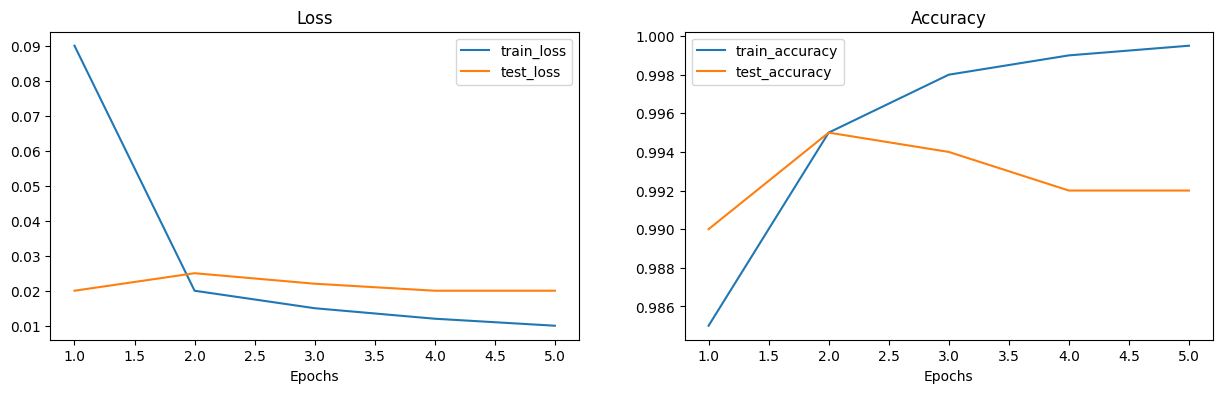

In [ ]:
plot_training_curves(results)

In [ ]:
# Define the directory to save the model
model_directory = Path("models")
model_directory.mkdir(parents=True, exist_ok=True)

# Define the model file name and path
model_filename = "ASL_EfficientNetB0_model.pth"
model_filepath = model_directory / model_filename

# Save the model's state dictionary
print(f"Saving model to: {model_filepath}")
torch.save(model.state_dict(), "/content/drive/MyDrive/Final Project CV")

### Loading the Pre-trained EfficientNet Model

In this section, we load the pre-trained EfficientNet-B0 model and modify its fully connected layer to match the number of classes in our dataset. We then load the saved state dictionary into the model and print the device on which the model is loaded.

The code performs the following steps:
1. **Load the Pre-trained Model**: Load the EfficientNet-B0 model pre-trained on ImageNet.
2. **Modify the Fully Connected Layer**: Replace the fully connected layer to have 29 output features, corresponding to the 29 classes in our dataset.
3. **Load the Saved State Dictionary**: Load the state dictionary from the saved model file.
4. **Print the Device**: Print the device (CPU or GPU) on which the model is loaded.


In [7]:
from efficientnet_pytorch import EfficientNet
loaded_model = EfficientNet.from_pretrained('efficientnet-b0').to('cpu')
loaded_model._fc = nn.Linear(loaded_model._fc.in_features, 29)

# Load the state dictionary with map_location='cpu'
loaded_model.load_state_dict(torch.load(f="./Vision2Sign/ASL_EfficientNetB0_model.pth", map_location=torch.device('cpu')))

# print(f"Loaded model:\n{loaded_model}")
print(f"Model on device:\n{next(loaded_model.parameters()).device}")

Loaded pretrained weights for efficientnet-b0
Model on device:
cpu


"""
Generates predictions for a given dataset using a specified model and device.

Args:
    model (torch.nn.Module): The neural network model used for generating predictions.
    dataset (iterable): The dataset containing the input data for prediction.
    device (torch.device): The device (CPU or GPU) on which the model and data will be loaded.

Returns:
    torch.Tensor: A tensor containing the predicted probabilities for each item in the dataset.
"""

In [8]:
def generate_predictions(model, dataset, device):
    probabilities = []
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for item in dataset:
            item = torch.unsqueeze(item, dim=0).to(device)
            logits = model(item)
            prob = torch.softmax(logits.squeeze(), dim=0)
            probabilities.append(prob.cpu())

    return torch.stack(probabilities)

This script randomly selects 30 samples from the `test_data` dataset and appends them to `test_samples` and `test_labels` lists.

- `random.seed(42)`: (Commented out) Sets the seed for the random number generator for reproducibility.
- `test_samples`: List to store the randomly selected samples.
- `test_labels`: List to store the labels corresponding to the randomly selected samples.
- `random.sample(list(test_data), k=30)`: Randomly selects 30 items from `test_data`.
- `test_samples.append(sample)`: Appends the selected sample to the `test_samples` list.
- `test_labels.append(label)`: Appends the corresponding label to the `test_labels` list.

In [16]:
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 29):
  test_samples.append(sample)
  test_labels.append(label)

### Generating Predictions for Test Samples

In this section, we generate predictions for the randomly selected test samples using the pre-trained EfficientNet model. The predictions are obtained by passing the test samples through the model and calculating the predicted probabilities for each class.

The code performs the following steps:
1. **Generate Predicted Probabilities**: Use the `generate_predictions` function to obtain the predicted probabilities for each test sample. The function takes the pre-trained model, test samples, and device (CPU or GPU) as inputs.
2. **Determine Predicted Classes**: Use the `argmax` function to determine the predicted class for each test sample based on the highest predicted probability.

The resulting `loaded_pred_classes` tensor contains the predicted class indices for the test samples, which can be compared with the true labels to evaluate the model's performance.

In [17]:
device = 'cpu'

In [18]:
loaded_pred_probs = generate_predictions(loaded_model,test_samples,device)

loaded_pred_classes = loaded_pred_probs.argmax(dim = 1)

### Visualizing Predictions vs. Actual Labels

In this section, we visualize the predictions made by the pre-trained EfficientNet model against the actual labels for a set of randomly selected test samples. This helps us to understand the model's performance and identify any misclassifications.

The code performs the following steps:
1. **Set Figure Size**: Create a figure with a size of 16x12 inches.
2. **Define Grid Dimensions**: Set the number of rows and columns for the grid of images (5 rows and 6 columns).
3. **Define Class Names**: Create an array of class names corresponding to the American Sign Language alphabet and additional classes for "delete", "nothing", and "space".
4. **Loop Through Test Samples**: Loop through the randomly selected test samples.
5. **Permute Image Dimensions**: Permute the dimensions of each image tensor to make it compatible with `matplotlib` for visualization.
6. **Display Image**: Display each image using `plt.imshow`.
7. **Set Title**: Set the title of each subplot to show the predicted label and the actual label. If the prediction is correct, the title is displayed in green; otherwise, it is displayed in red.
8. **Remove Axes**: Remove the axes for a cleaner visualization.

The resulting plot provides a visual comparison of the model's predictions against the actual labels, highlighting any discrepancies.

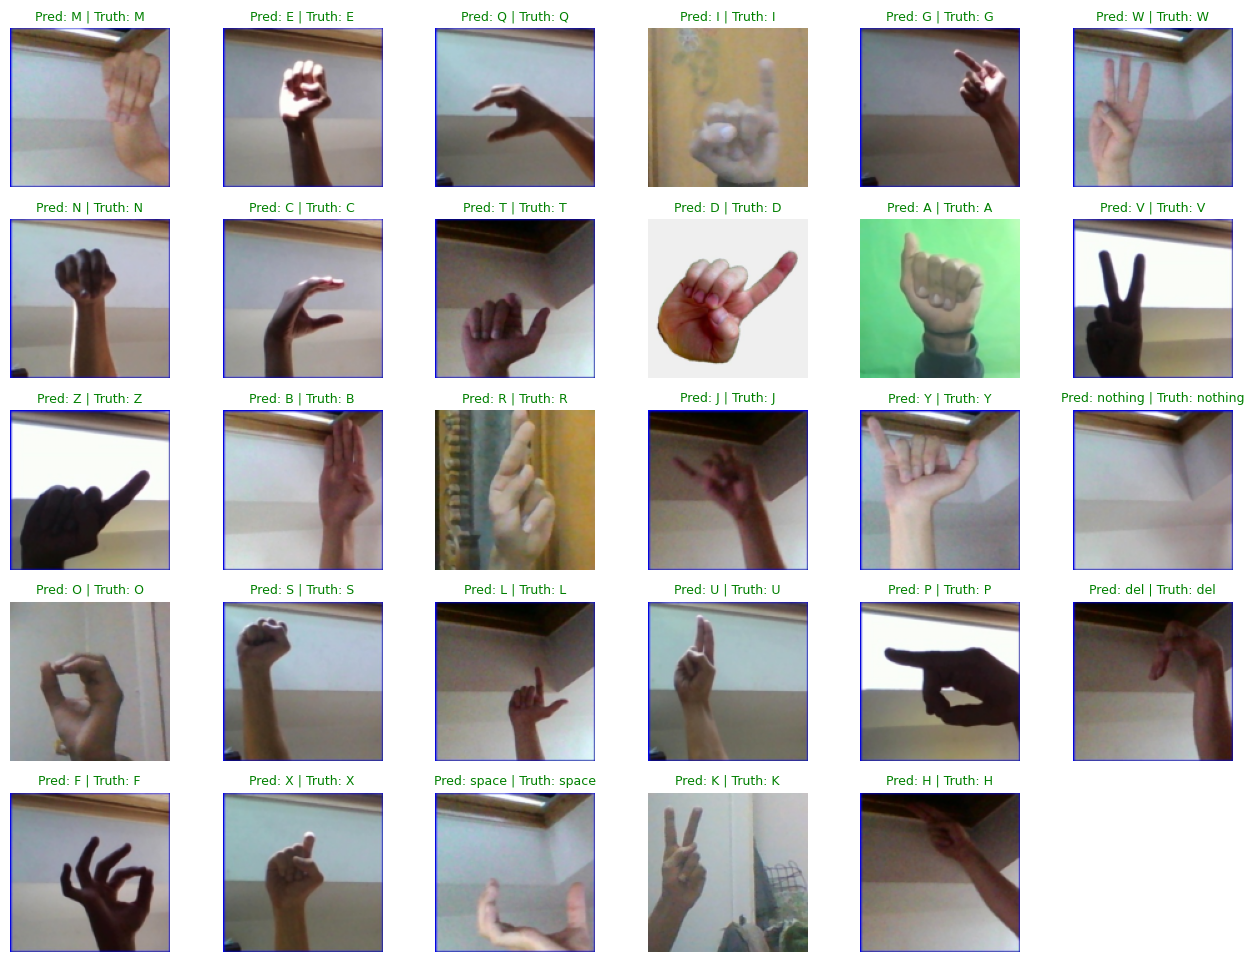

In [19]:
plt.figure(figsize=(16, 12))
rows, cols = 5, 6

class_names = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
                        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
                        'del', 'nothing', 'space'])

for idx, sample in enumerate(test_samples):
    plt.subplot(rows, cols, idx + 1)
    sample_image = sample.permute(1, 2, 0).numpy()
    plt.imshow(sample_image)

    predicted_label = class_names[loaded_pred_classes[idx]]
    actual_label = class_names[test_labels[idx]]
    title = f"Pred: {predicted_label} | Truth: {actual_label}"

    if predicted_label == actual_label:
        plt.title(title, fontsize=9, color="green")
    else:
        plt.title(title, fontsize=9, color="red")

    plt.axis('off')